<a href="https://colab.research.google.com/github/pujitharanigelam/html/blob/main/loan_data_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

In [ ]:
import gdown

File_id = '11sfx9Kdxyr-PMEfz7b7Q8lAyO2VC2Myv'
url=f'https://drive.google.com/uc?id={File_id}'

output='loan_data.csv'
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=11sfx9Kdxyr-PMEfz7b7Q8lAyO2VC2Myv
To: /content/loan_data.csv
100%|██████████| 3.30k/3.30k [00:00<00:00, 8.80MB/s]


'loan_data.csv'

In [ ]:
import pandas as pd

df = pd.read_csv('loan_data.csv')
df.head()

,ApplicantIncome,CreditScore,LoanAmount,EmploymentStatus,PreviousDefaults,LoanStatus
0,17795,697,56295,Unemployed,0,1
1,2860,692,433029,Self-Employed,1,0
2,7390,506,438215,Self-Employed,0,0
3,13964,314,371184,Unemployed,0,0
4,13284,760,324327,Self-Employed,0,1


In [ ]:
#data handling
import pandas as pd
import numpy as np

#visuallization
import matplotlib.pyplot as plt
import seaborn as sns

#model buliding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
#data is already loaded
df = pd.read_csv('loan_data.csv')

#check first 5 rows
df.head()

,ApplicantIncome,CreditScore,LoanAmount,EmploymentStatus,PreviousDefaults,LoanStatus
0,17795,697,56295,Unemployed,0,1
1,2860,692,433029,Self-Employed,1,0
2,7390,506,438215,Self-Employed,0,0
3,13964,314,371184,Unemployed,0,0
4,13284,760,324327,Self-Employed,0,1


In [ ]:
#check data set into and missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   ApplicantIncome                 100 non-null    int64
 1   CreditScore                     100 non-null    int64
 2   LoanAmount                      100 non-null    int64
 3   PreviousDefaults                100 non-null    int64
 4   LoanStatus                      100 non-null    int64
 5   Loanstatus                      100 non-null    int64
 6   EmploymentStatus_Self-Employed  100 non-null    bool 
 7   EmploymentStatus_Unemployed     100 non-null    bool 
dtypes: bool(2), int64(6)
memory usage: 5.0 KB


,0
ApplicantIncome,0
CreditScore,0
LoanAmount,0
PreviousDefaults,0
LoanStatus,0
Loanstatus,0
EmploymentStatus_Self-Employed,0
EmploymentStatus_Unemployed,0


In [ ]:
#full catagorical missing values with mode
for col in df.select_dtypes(include=['object']).columns:
  df[col].fillna(df[col].mode()[0],implace=True)

#fill number missing value with median

for col in df.select_dtypes(include=np.number).columns:
  df[col].fillna(df[col].median(), inplace=True)

#confirm no missing values remain
df.isnull().sum()


/tmp/ipython-input-3507163981.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


,0
ApplicantIncome,0
CreditScore,0
LoanAmount,0
PreviousDefaults,0
LoanStatus,0
Loanstatus,0
EmploymentStatus_Self-Employed,0
EmploymentStatus_Unemployed,0


In [ ]:
#use leabelencoded for targer colum
le= LabelEncoder()
df['Loanstatus'] = le.fit_transform(df['LoanStatus'])

#encode other categorical features
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df,columns=categorical_cols, drop_first=True)

df.head()

,ApplicantIncome,CreditScore,LoanAmount,PreviousDefaults,LoanStatus,Loanstatus,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed
0,17795,697,56295,0,1,1,False,True
1,2860,692,433029,1,0,0,True,False
2,7390,506,438215,0,0,0,True,False
3,13964,314,371184,0,0,0,False,True
4,13284,760,324327,0,1,1,True,False


In [ ]:
x = df.drop('LoanStatus' , axis=1)
y =df['LoanStatus']

#split dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

#predict on test set
y_pred = model.predict(x_test)



accuracy:1.0


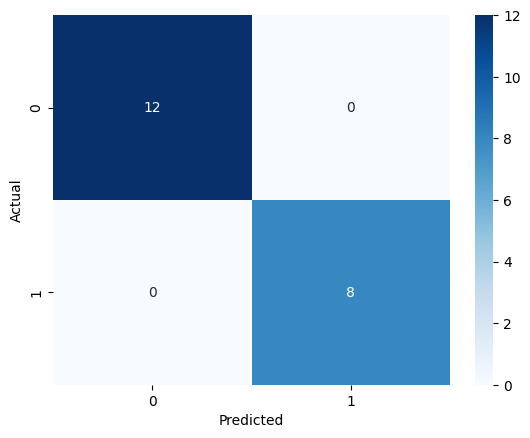

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
#accuracy
print(f"accuracy:{accuracy_score(y_test,y_pred)}")
#confussion matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#classification report
print(classification_report(y_test,y_pred))